#CENG391 - Homework#4
##GitHub: halilcanuyanik

##Importing related libraries

In [ ]:
import cv2 # used to create histogram
import numpy as np # used to change image's value range (type)
from skimage.io import imread # used to read images
import matplotlib.pyplot as plt # used to plot images
from skimage.color import rgb2gray # used to convert rgb images to gray
from skimage.filters import threshold_otsu # used to apply otsu thresholding to the image

img = imread("https://raw.githubusercontent.com/muthuspark/ml_research/master/resources/sudoku4.jpg") # image url

##Converting image to grayscale and changing type (range)

In [ ]:
gray_img = rgb2gray(img) # converting image to grayscale
gray_img*=255
gray_img = gray_img.astype(np.uint8) # now our image is in [0-255] range

##Creating histogram to look at it and choose a value as an initial estimate

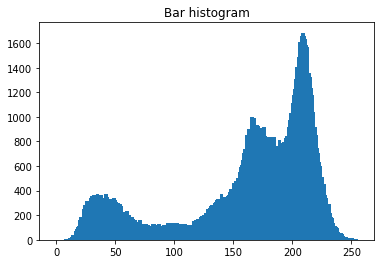

In [ ]:
# creating histogram (this part is copied by the lecture's segmentation python notebook)
hist = cv2.calcHist([gray_img], [0], None, [256], [0,255])
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 3)
plt.title("Bar histogram")
plt.show()

##Basic Global Thresholding Implementation

In [ ]:
initial_estimate = 140 # selecting initial estimate for threshold
epsilon = 0.5 # predefined value for measuring the convergence
final_threshold = None
flag = True

while flag:
  high_values = list()
  low_values = list()
  # all pixels along the image dimensions will be checked whether they are greater than threshold value or not. This "for" and inner "for" loop structure will provide that.
  for i in range(gray_img.shape[0]):
    for j in range(gray_img.shape[1]):
        if gray_img[i,j] > initial_estimate:
            high_values.append(gray_img[i,j])
        else:
            low_values.append(gray_img[i,j])
  mu1 = 0 # mean value for values greater than threshold will be calculated. (mu1 or mean1)
  mu2 = 0 # mean value for values less than threshold will be calculated. (mu2 or mean2)
  for value in high_values:
    mu1 += value
  for value in low_values:
    mu2 += value
  mu1 /= len(high_values) # mean value for values greater than threshold is calculated.
  mu2 /= len(low_values)  # mean value for values less than threshold is calculated.
  final_threshold = ((mu1 + mu2) / 2) # threshold value for current iteration is calculated.
  if (abs(final_threshold - initial_estimate) < epsilon): # checking if the threshold value is convergent according to the predefined value
    flag = False # if condition is satisfied, it terminates the loop by making the flag variable "False".
  else :
    initial_estimate = final_threshold

# applying the final threshold value to the image
thresholded_img = gray_img > final_threshold

# threshold values for basic global thresholding and otsu's thresholding are mentioned 2 code blocks below.

##Thresholding the image using the skimage library implementation

In [ ]:
# getting otsu's threshold value by calling the threshold_otsu() function from the library
threshold_value_for_otsu = threshold_otsu(gray_img)

# applying otsu's thresholding to the image
otsu_thresholded_img = gray_img > threshold_value_for_otsu

##Displaying the thresholding values for basic global thresholding and otsu's thresholding

In [ ]:
# displaying the threshold value for basic global thresholding
print("Final threshold value for basic global thresholding is " + str(final_threshold))

print()

# displaying the threshold value for otsu's thresholding
print("Threshold value for otsu's optimum global thresholding is " + str(threshold_value_for_otsu))

Final threshold value for basic global thresholding is 124.41714371829862

Threshold value for otsu's optimum global thresholding is 124


##Displaying the images side by side

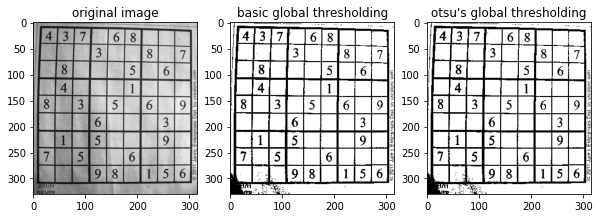

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 5))

ax[0].set_title("original image")
ax[0].imshow(gray_img, cmap="gray")

ax[1].set_title("basic global thresholding")
ax[1].imshow(thresholded_img, cmap="gray")

ax[2].set_title("otsu's global thresholding")
ax[2].imshow(otsu_thresholded_img, cmap="gray")

plt.show()